## EDA of Kickstarter Data

For this project we're going to explore a free dataset on Kaggle with Kickstarter project data from May 2009 to March 2018. We will perform some EDA on the data (Exploratory Data Analysis) to gather any insights. 

**Questions to Answer:**  
1a. Examine the `state` column to see unique values and counts.  
1b. Show a pie chart of the `state` project count for all projects.  
1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.  
*note - from here out we'll be looking at the completed project data unless mentioned otherwise*

2a. What is the overall success rate for all completed kickstarter projects?  
2b. Which 5 projects were pledged the most money (usd_pledged_real)?  
2c. Which 5 projects had the most backers?  
2d. Which year had the most competition? (# of projects)  

3a. What is the success rate for all projects broken down by `main_category`?  
3b. Show a horizontal bar chart for project success rate by `main_category`, sorted by highest to lowest.  
3c. Within the Games `main_category`, what is the success rate for each `category` within it?  

4a. Calculate the 'pct_of_goal' for each completed project  
4b. What were the top 5 projects when looking at pct_of_goal for all time?  
4c. Plot a histogram distribution of all completed projects by pct_of_goal  
4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)  

5a. What is the average `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5b. What is the median `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5c. What is the average `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5d. What is the median `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5e. What insights does this information provide?  
5f. Based on this information, if someone wanted to choose the `main_category` with the highest combined success rate and pledged dollar amount, which one would you recommend?  

6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.  
6b. Compare the avg months for successful projects vs non-successful.  Add visuals if you'd like.  
6c. Does the length of a project in months seem to have an impact?  

*Let's zoom in on Games: Video Games (main_category: category)*

7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).  
7b. Do this again but broken down by deadline year  
7c. Show this in a bar chart  
7d. What insights does this data provide you?  

*Let's zoom in on personal planners*

8a. Calculate the project count, success rate, and pct_of_goal for all projects with 'planner' in the name.  Check for spelling variations in upper/lowercase.  
8b. How about all projects with both 'planner' and 'Panda' in the name?  
8c. Congrats Panda Planner!  (That's my bro's company)


First, lets open the data set and have a look at some rows and columns:

In [5]:
from csv import reader
import os
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

opened_file = open('/Users/Chris/Desktop/ks-data.csv')
read_file = reader(opened_file)
ks_data = list(read_file)


In [6]:
ks_data[0:5]

[['ID',
  'name',
  'category',
  'main_category',
  'currency',
  'deadline',
  'goal',
  'launched',
  'pledged',
  'state',
  'backers',
  'country',
  'usd pledged',
  'usd_pledged_real',
  'usd_goal_real'],
 ['1000002330',
  'The Songs of Adelaide & Abullah',
  'Poetry',
  'Publishing',
  'GBP',
  '2015-10-09',
  '1000.00',
  '2015-08-11 12:12:28',
  '0.00',
  'failed',
  '0',
  'GB',
  '0.00',
  '0.00',
  '1533.95'],
 ['1000003930',
  'Greeting From Earth: ZGAC Arts Capsule For ET',
  'Narrative Film',
  'Film & Video',
  'USD',
  '2017-11-01',
  '30000.00',
  '2017-09-02 04:43:57',
  '2421.00',
  'failed',
  '15',
  'US',
  '100.00',
  '2421.00',
  '30000.00'],
 ['1000004038',
  'Where is Hank?',
  'Narrative Film',
  'Film & Video',
  'USD',
  '2013-02-26',
  '45000.00',
  '2013-01-12 00:20:50',
  '220.00',
  'failed',
  '3',
  'US',
  '220.00',
  '220.00',
  '45000.00'],
 ['1000007540',
  'ToshiCapital Rekordz Needs Help to Complete Album',
  'Music',
  'Music',
  'USD',
  '20

### We can see the columns are:

| Index      | Syntax |
| ----------- | ----------- |
| 0 | 'ID' |
| 1 | 'name'|
|2|  'category'|
|3 | 'main_category'|
|4 | 'currency'|
|5 | 'deadline'|
|6 | 'goal'|
|7 |'launched'|
|8 | 'pledged'|
|9 | 'state'|
|10 | 'backers'|
|11  |'country'|
|12 | 'usd pledged'|
|13 | 'usd_pledged_real'|
|14 | 'usd_goal_real'|


Let's seperate the header from the rest of the list to make our EDA simpler:


In [7]:
ks_header = ks_data[0]
ks_data = ks_data[1:]

## Task 1.a

1a. Examine the state column to see unique values and counts:

In [8]:
state_freq_table = {}

for row in ks_data:
    state = row[9]
    if state not in state_freq_table:
        state_freq_table[state] = 1
    else:
        state_freq_table[state] += 1
        
print(state_freq_table)

{'failed': 197719, 'canceled': 38779, 'successful': 133956, 'live': 2799, 'undefined': 3562, 'suspended': 1846}


## Task 1.b

1b. Show a pie chart of the state project count for all projects:

* I'd like to re-arrange the labels for easier reading, but for now this works...

In [9]:
print(state_freq_table)

{'failed': 197719, 'canceled': 38779, 'successful': 133956, 'live': 2799, 'undefined': 3562, 'suspended': 1846}


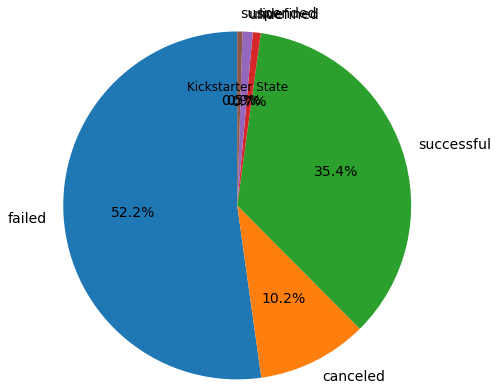

In [10]:
import matplotlib.pyplot as plt

state = [] 
values = [] 
items = state_freq_table.items() 
for item in items: 
    state.append(item[0]), values.append(item[1]) 

plt.pie(values, labels=state, startangle=90, autopct='%.1f%%', radius=2,textprops={'fontsize': 14})
plt.title('Kickstarter State')
plt.show()

## Task 1c. 

Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.

Ultimately, we want a dataset with only completed projects for our analysis.

In [11]:
ks_completed = []

for row in ks_data:
    state = row[9]
    if state == "successful":
        ks_completed.append(row)
    elif state == "canceled":
        ks_completed.append(row)
    elif state == "failed":
        ks_completed.append(row)
        

In [12]:
print(len(ks_data))
print(len(ks_completed))

378661
370454


## Task 2.a

2a. What is the overall success rate for all completed kickstarter projects?

let's capture the percentage of the `successful` projects:

In [13]:
success = []

for row in ks_completed:
    state = row[9]
    if state == "successful":
        success.append(row)
        

per_success = ((len(success) / len(ks_completed)) * 100)
print(len(success))
print(str(round(per_success, 1)) + " percent of Kickstarter projects are successful.")

133956
36.2 percent of Kickstarter projects are successful.


## Quick Double-check:

Before we go any further, let's check the kickstarter dataset for any missing variables, first by making sure all rows are the same length:

In [14]:
for row in ks_completed:
    totallength = len(ks_completed[0])
    rowlength = len(row) 
    if rowlength != totallength:
        print(row)
        print(as_data.index(row))

Looks good!

## Task 2.b

2b. Which 5 projects were pledged the most money (usd_pledged_real)?

In [15]:
#converting to pandas

ks_data = pd.read_csv('/Users/Chris/Desktop/ks-data.csv', delimiter = ',')

In [16]:
#removing live, suspended and undefined
ks_completed = ks_data[ks_data.state != "live"]
ks_completed = ks_data[ks_data.state != "suspended"]
ks_completed = ks_data[ks_data.state != "undefined"]

In [17]:
#2 ways to complete this:

#super simple:
#ks_data.nlargest(5, "usd_pledged_real")

#I like the output of this one, just the variables you want:


ks_sort = ks_completed.sort_values('usd_pledged_real', ascending=False)

columnsData = ks_sort.loc[ :5 , ['name', 'usd_pledged_real'] ]
print(columnsData[:5])

                                                     name  usd_pledged_real
157270   Pebble Time - Awesome Smartwatch, No Compromises       20338986.27
250254  COOLEST COOLER: 21st Century Cooler that's Act...       13285226.36
216629             Pebble 2, Time 2 + All-New Pebble Core       12779843.49
289915                         Kingdom Death: Monster 1.5       12393139.69
282416       Pebble: E-Paper Watch for iPhone and Android       10266845.74


## Task 2.c

2c. Which 5 projects had the most backers?

In [18]:
#2 ways to complete this:

#super simple:
#ks_data.nlargest(5, "backers")

#I like the output of this one, just the variables you want:

ks_sort = ks_completed.sort_values('backers', ascending=False)

columnsData = ks_sort.loc[ :5 , ['name', 'backers'] ]
print(columnsData[:5])

                                                     name  backers
187652                                  Exploding Kittens   219382
75900                       Fidget Cube: A Vinyl Desk Toy   154926
292244  Bring Reading Rainbow Back for Every Child, Ev...   105857
148585                    The Veronica Mars Movie Project    91585
182657                              Double Fine Adventure    87142


## Task 2.d

2d. Which year had the most competition? (# of projects)

In [19]:
# now lets extract the year:

ks_completed.launched.dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
ks_year = pd.DatetimeIndex(ks_completed['launched']).year
ks_year


In [ ]:

top_year = ks_year.max(axis = 0)
print(f"Kickstaters most competitive year was {top_year}")